In [1]:
import pandas as pd
import numpy as np

### Adverstiment Dataset
>The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles 
>like radio, tv and newspaper.

### Attribution Descriptions
>TV - Spend on TV Advertisements <br>
>Radio - Spend on radio Advertisements <br>
>Newspaper - Spend on newspaper Advertisements <br>
>Sales - Sales revenue generated <br>
Note: The amounts are in diffrent units

In [2]:
# load the data set
advt = pd.read_csv( "Advertising.csv" )

In [3]:
advt.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(advt)

Number of variables,5
Number of observations,200
Total Missing (%),0.0%
Total size in memory,7.9 KiB
Average record size in memory,40.4 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#Remove the first column

advt = advt[["TV", "Radio", "Newspaper", "Sales"]]

In [8]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


advt.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.907,296.4
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.400,49.6
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.515,114.0
Sales,200.0,0.0,2804.5,14.0225,12.90,5.217457,27.221853,1.6,4.784,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.507,27.0


In [10]:
var_summary(advt.TV)

N           200.000000
NMISS         0.000000
SUM       29408.500000
MEAN        147.042500
MEDIAN      149.750000
STD          85.854236
VAR        7370.949893
MIN           0.700000
P1            5.387000
P5           13.195000
P10          24.880000
P25          74.375000
P50         149.750000
P75         218.825000
P90         261.440000
P95         280.735000
P99         292.907000
MAX         296.400000
dtype: float64

In [11]:
#Handling Outliers
advt['Sales']= advt['Sales'].clip_upper(advt['Sales'].quantile(0.99)) 
advt['Sales']= advt['Sales'].clip_lower(advt['Sales'].quantile(0.01)) 

advt['Newspaper']= advt['Newspaper'].clip_upper(advt['Newspaper'].quantile(0.99)) 
advt['Newspaper']= advt['Newspaper'].clip_lower(advt['Newspaper'].quantile(0.01))

In [12]:
#Handling Missings
# Fill with mean
advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())

In [13]:
#Dummy variable creation
#print df_G.join(pd.get_dummies(advt['key'], prefix='dummy')).drop('key', axis=1).drop('dummy_c', axis=1)

In [14]:
# exploring data
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


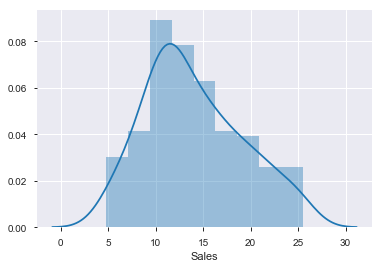

In [15]:
sns.distplot( advt.Sales )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


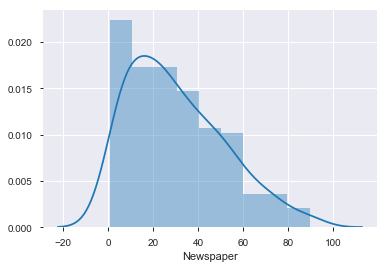

In [16]:
sns.distplot( advt.Newspaper )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


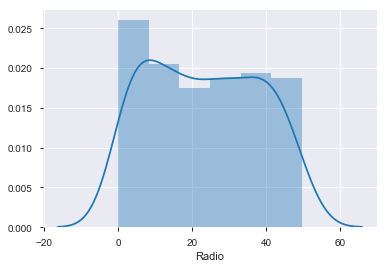

In [17]:
sns.distplot( advt.Radio )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


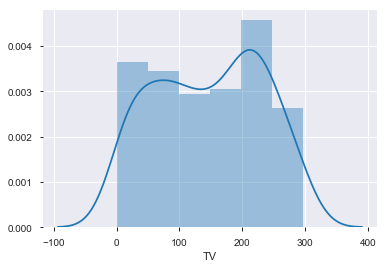

In [18]:
sns.distplot( advt.TV )

### Notes:
>Sales seems to be normal distribution. Spending on newspaper advertisement seems to be righ skewed.
Most of the spends on newspaper is fairly low where are spend on radio and tv seems be uniform distribution. 
Spends on tv are comparatively higher then spens on radio and newspaper.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


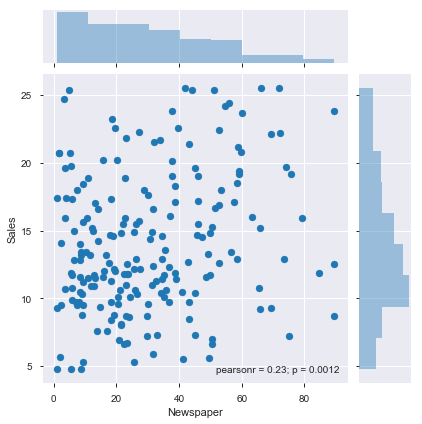

In [19]:
#Is there a relationship between sales and spend various advertising channels?

#Sales Vs. Newspaper advertisement spends

sns.jointplot(  advt.Newspaper, advt.Sales )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


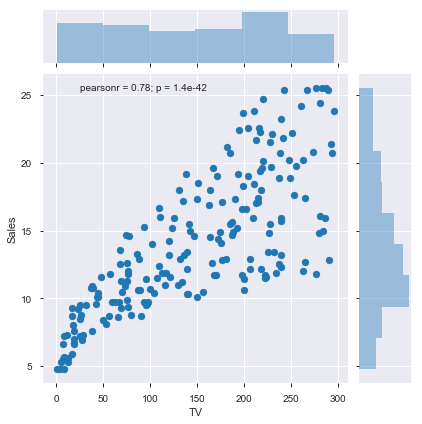

In [20]:
#Sales Vs. TV advertisement spends
sns.jointplot(  advt.TV, advt.Sales )

# Notes
>Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.

In [21]:
sns.pairplot?

In [1]:
# Visualizing pairwise correleation

#sns.pairplot( advt )

In [23]:
# Calculating correlations
advt.TV.corr( advt.Sales )

0.7823681984532047

In [24]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059085,0.782368
Radio,0.054809,1.000000,0.356255,0.583363
Newspaper,0.059085,0.356255,1.000000,0.227594
Sales,0.782368,0.583363,0.227594,1.000000


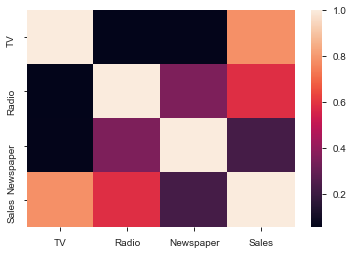

In [25]:
# Visualizing the correlations
#The darker is the color, the stronger is the correlation
sns.heatmap( advt.corr() )

### NOTES:
> The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then betweeb sales and radio i.e. 0.576. <br>
> correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing

### Building Regression Model


In [26]:
import statsmodels.formula.api as smf

In [27]:
advt.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [38]:
lm=smf.ols('Sales~TV', advt).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.4
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.39e-42
Time:                        00:05:01   Log-Likelihood:                -516.11
No. Observations:                 200   AIC:                             1036.
Df Residuals:                     198   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1441      0.451     15.835      0.0

### Notes:
> Parameters estimated are considered to be significant if p-value is less than 0.05 <br>
> This indicates intercept and TV both are significant parameters. And the parameter estimates can be accepted. <br>
> So, the linear model is Sales=7.032+0.047∗TV


### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

In [40]:
lm.rsquared

0.612099997950913

In [41]:
round( float( lm.rsquared ), 2 )

0.61

In [42]:
### MAKING PREDICTIONS
lmpredict = lm.predict( {'TV': advt.TV } )

In [43]:
lmpredict[0:10]

0    17.927986
1     9.229650
2     7.950207
3    14.244315
4    15.617490
5     7.551846
6     9.838908
7    12.777408
8     7.547159
9    16.507945
dtype: float64

In [44]:
from sklearn import metrics

### Calculating mean square error ... RMSE
> RMSE calculate the difference between the actual value and predicted value of the response variable <br>
> The square root of the mean/average of the square of all of the error. <br> 
> Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
> The lesser the RMSE value, the better is the model.

In [45]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )

In [46]:
rmse = np.sqrt( mse )

In [47]:
rmse

3.195068475508053

In [48]:
#Get the residuals and plot them
lm.resid[1:10]

1    1.170350
2    1.349793
3    4.255685
4   -2.717490
5   -0.351846
6    1.961092
7    0.422592
8   -2.747159
9   -5.907945
dtype: float64

> One of the assumptions is that the residuals should be normally distributed i.e. it should be random.
The residuals should be plotted against the response variable and it should not show any pattern

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


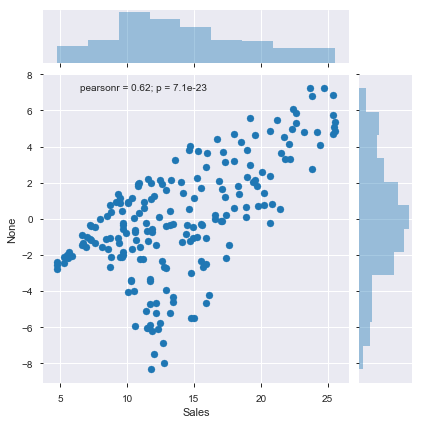

In [49]:
sns.jointplot(  advt.Sales, lm.resid )

### Multiple Linear Regression Model

In [50]:
from sklearn import metrics

In [51]:
lm = smf.ols( 'Sales ~ TV + Radio + Newspaper', advt ).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     624.0
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          5.60e-100
Time:                        00:06:31   Log-Likelihood:                -375.19
No. Observations:                 200   AIC:                             758.4
Df Residuals:                     196   BIC:                             771.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0850      0.296     10.416      0.0

In [53]:
lm.params

Intercept    3.085033
TV           0.045113
Radio        0.189195
Newspaper   -0.002786
dtype: float64

In [54]:
lm.pvalues

Intercept    1.686808e-20
TV           1.746108e-84
Radio        4.289607e-58
Newspaper    6.265164e-01
dtype: float64

In [55]:
lm = smf.ols( 'Sales ~ TV + Radio', advt ).fit()

In [56]:
lm.params

Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

In [57]:
lm.pvalues

Intercept    6.369904e-22
TV           6.960144e-85
Radio        3.849279e-62
dtype: float64

In [58]:
lmpredict = lm.predict( {'TV': advt.TV, 'Radio':advt.Radio } )

In [59]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )
rmse = np.sqrt( mse )
rmse

1.5803352244496103

In [60]:
metrics.mean_absolute_error(advt.Sales, lmpredict)

1.2144738980079277

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


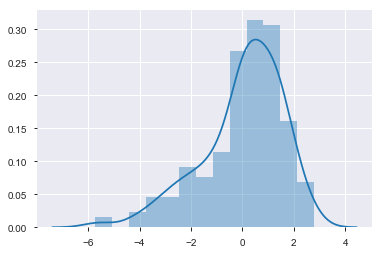

In [61]:
sns.distplot(lm.resid)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


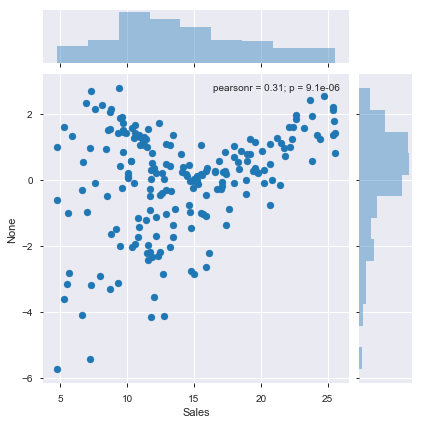

In [62]:
sns.jointplot(  advt.Sales, lm.resid )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.cross_validation import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
  advt[["TV", "Radio", "Newspaper"]],
  advt.Sales,
  test_size=0.3,
  random_state = 42 )

In [68]:
print(len( X_train ))
print(len( X_test))

140
60


In [69]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [70]:
linreg.coef_

array([0.04304563, 0.20038167, 0.00412615])

In [71]:
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

1.9542412515201593

In [72]:
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

1.4345276075554683

In [73]:
metrics.r2_score( y_train, y_pred_t )

0.9180965036894541

In [74]:
metrics.r2_score( y_test, y_pred )


0.8601313440383326

In [75]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.04304563002997129),
 ('Radio', 0.20038167342257335),
 ('Newspaper', 0.004126150332766351)]

In [76]:
residuals = y_test - y_pred

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


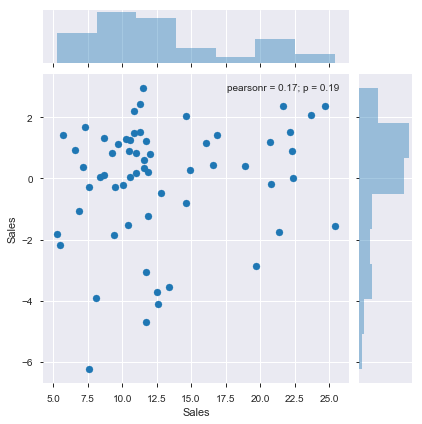

In [77]:
sns.jointplot(  advt.Sales, residuals )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


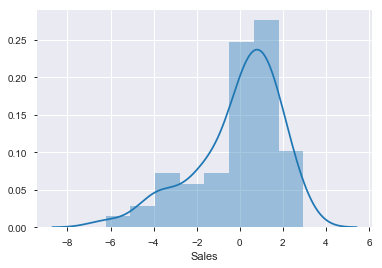

In [78]:
sns.distplot( residuals )

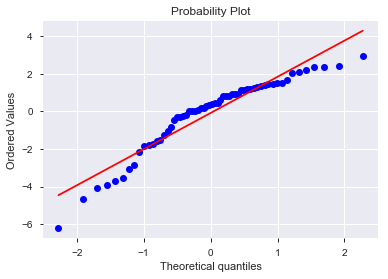

In [79]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [80]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [81]:
linreg = LinearRegression()

In [82]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

array([0.81273642, 0.86899108, 0.95078413, 0.92388255, 0.94066739,
       0.91270145, 0.85967026, 0.95648188, 0.76544669, 0.90216789])

In [83]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.89

In [84]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [85]:
F_values, p_values  = f_regression(  X_train, y_train )

In [86]:
F_values

array([185.0114304 ,  93.76524204,   8.13474053])

In [87]:
['%.3f' % p for p in p_values]

['0.000', '0.000', '0.005']

As p - values are less than 5% - the variables are siginificant in the regression equation.

In [88]:
### Exporting and importing the model
import pickle

In [89]:
from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)

['lin_model.pkl']

In [90]:
model_clone = joblib.load('lin_model.pkl')